# Segmentation

In [1]:
# general imports:
import os
import importlib
from torch import nn, cuda
from torch import optim
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# my imports (reload all modules):

from data.dataset import load_data_deep_crack
from models.unet_resnet34 import UNetResNet34
from models.unet_swin import UNetSwin
from models.unet import UNet
from training.metrics import DiceLoss
from training.train import train
from utils import save_model_files
from utils import log_training_result


import data.dataset
import models.unet_resnet34
import models.unet_swin
import models.unet
import training.metrics
import training.train
import utils
importlib.reload(data.dataset)
importlib.reload(models.unet_resnet34)
importlib.reload(models.unet_swin)
importlib.reload(models.unet)
importlib.reload(training.metrics)
importlib.reload(training.train)
importlib.reload(utils)

os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
print(f'Number of visible CUDA devices: {cuda.device_count()}')
cuda.is_available()
# NOTE: when referring to a CUDA device, torch will only know about visible devices
#       so while currently we will be using gpu05
#       this will be device `cuda:0`

data_source ='../../DeepCrack/dataset/DeepCrack'
train_image_dir = data_source + '/train_img'
train_mask_dir = data_source + '/train_lab'
test_image_dir = data_source + '/test_img'
test_mask_dir = data_source + '/test_lab'

train_dl, val_dl, train_dataset, val_dataset = load_data_deep_crack(train_image_dir, train_mask_dir, [0.8, 0.2])

c:\Users\Csaba\miniconda3\envs\cenv2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Csaba\miniconda3\envs\cenv2\Lib\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.7' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Number of visible CUDA devices: 1
This gives us 240 train and 60 validation samples.


## Run the model

In [2]:
model = UNet(   img_channels = 3,
                mask_channels = 1,
                base_channel_size = 16,
                depth=5)  
loss = DiceLoss()
optimizer = optim.Adam(params = model.parameters(), lr = 1e-3)

dice_idcs = []
epoch_dice_idcs = []
val_dice_idcs = []
train_loss = []
val_loss = []
epoch_durations = []
best_model_wts = {}

In [9]:
train(model, loss, optimizer, train_dl, val_dl, num_epochs = 100, accum_scale = 4, dice_idcs = dice_idcs, epoch_dice_idcs = epoch_dice_idcs, val_dice_idcs = val_dice_idcs, best_model_wts = best_model_wts, train_loss=train_loss, val_loss=val_loss, epoch_durations=epoch_durations, save_path='../saved_models/unet_5_2/', n_epoch_save=3)

Train loss:  0.11450262765089671
Epoch  1 . finished.
Validation loss:  0.13057615359624228
Epoch 1/100 completed in 72.10 seconds
Train loss:  0.11111591955025991
Epoch  2 . finished.
Validation loss:  0.13796767791112263
Epoch 2/100 completed in 74.47 seconds
Train loss:  0.11068273385365804
Epoch  3 . finished.
Validation loss:  0.14134862422943115
save files
Epoch 3/100 completed in 71.12 seconds
Train loss:  0.11340749065081278
Epoch  4 . finished.
Validation loss:  0.14184262752532958
Epoch 4/100 completed in 73.65 seconds
Train loss:  0.11271156370639801
Epoch  5 . finished.
Validation loss:  0.13811826308568317
Epoch 5/100 completed in 80.07 seconds
Train loss:  0.11005576352278391
Epoch  6 . finished.
Validation loss:  0.14055875142415364
save files
Epoch 6/100 completed in 80.28 seconds
Train loss:  0.11249946455160777
Epoch  7 . finished.
Validation loss:  0.13879433472951253
Epoch 7/100 completed in 70.95 seconds
Train loss:  0.11263925035794577
Epoch  8 . finished.
Validat

In [8]:
log_training_result('../saved_models/training_log_2.csv', {
    "timestamp": pd.Timestamp.now(),
    "weights_file": "unet_5_1/",
    "epochs": 100,
    "learning_rate": 0.001,
    "batch_size": 4,
    "accum_scale": 4,
    "depth": 5,
    "base_channel_size": 16,    
    "comment": "Continue of uet_5_1",
    "augmentation": "rotate+randomCrop"
})

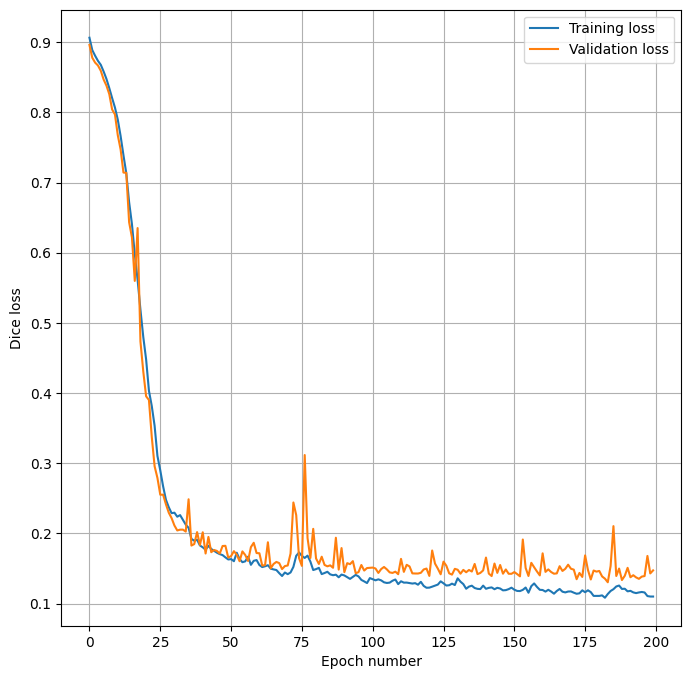

In [6]:
plt.figure(figsize = (8, 8))
plt.plot(train_loss)
plt.plot(val_loss)
plt.grid()

plt.xlabel('Epoch number')
plt.ylabel('Dice loss')
plt.legend(['Training loss', 'Validation loss'])
plt.show()